<a href="https://colab.research.google.com/github/KimJisanER/Dacon/blob/main/02_22_image_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import warnings
warnings.filterwarnings(action='ignore')

os.environ["CUDA_VISIBLE_DEVICES"]="0" # GPU 할당

In [2]:
#create training dataset
from glob import glob
import numpy as np
import PIL
from PIL import Image

path = '/content/drive/MyDrive/Image_classi/data/train/'

training_images = []
training_labels = []

for filename in glob(path +"*"):
    for img in glob(filename + "/*.jpg"):
        an_img = PIL.Image.open(img) #read img
        img_array = np.array(an_img) #img to array
        training_images.append(img_array) #append array to training_images 
        label = filename.split('/')[7] #get label
        training_labels.append(label) #append label
        
training_images = np.array(training_images)
training_labels = np.array(training_labels)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
training_labels= le.fit_transform(training_labels)
training_labels = training_labels.reshape(-1,1)

print(training_images.shape)
print(training_labels.shape)

(50000, 32, 32, 3)
(50000, 1)


In [3]:
print(training_labels)

[[2]
 [2]
 [2]
 ...
 [5]
 [5]
 [5]]


In [4]:
#create test dataset

path = '/content/drive/MyDrive/Image_classi/data/test/'

test_images = []
test_idx = []

flist = sorted(glob(path + '*.jpg'))

for filename in flist:
    an_img = PIL.Image.open(filename) #read img
    img_array = np.array(an_img) #img to array
    test_images.append(img_array) #append array to training_images 
    
    label = filename.split('/')[7] #get id 
    test_idx.append(label) #append id
    
test_images = np.array(test_images)

print(test_images.shape)
print(test_idx[0:5])

(10000, 32, 32, 3)
['0000.jpg', '0001.jpg', '0002.jpg', '0003.jpg', '0004.jpg']


[2],[2],[2],[2],[2],[2],[2],[2],[2],[2],

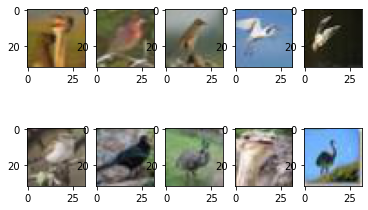

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(training_images[i])
    print(training_labels[i], end=",")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(training_images, training_labels, test_size=0.2, random_state=42)

X_test = test_images

In [7]:
print('X_train 크기:',X_train.shape)
print('X_valid 크기:',X_valid.shape)
print('X_test  크기:',X_test.shape)

X_train 크기: (40000, 32, 32, 3)
X_valid 크기: (10000, 32, 32, 3)
X_test  크기: (10000, 32, 32, 3)


In [8]:
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

In [9]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='SAME',input_shape=(32, 32, 3)), #cnn layer
    tf.keras.layers.MaxPooling2D(2, 2, padding='SAME'), #pooling layer
    tf.keras.layers.Dropout(0.23), # 무작위로 퍼셉트론 비활성화(23%)
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='SAME'),
    tf.keras.layers.MaxPooling2D(2, 2, padding='SAME'),
    tf.keras.layers.Dropout(0.23),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='SAME'),
    tf.keras.layers.MaxPooling2D(2, 2, padding='SAME'),
    tf.keras.layers.Dropout(0.23),
    tf.keras.layers.Flatten(), # N차원 배열 -> 1차원 배열
    tf.keras.layers.Dense(1024, activation = 'relu'), #fully connected layer
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation = 'softmax') # ouput layer
])

In [10]:
tf.config.run_functions_eagerly(False)

In [11]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 32)          0

In [13]:
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=30, batch_size=128)

Epoch 1/30
313/313 [==============================] - 15s 15ms/step - loss: 1.7512 - accuracy: 0.3512 - val_loss: 1.4536 - val_accuracy: 0.4750
Epoch 2/30
313/313 [==============================] - 4s 13ms/step - loss: 1.4513 - accuracy: 0.4693 - val_loss: 1.3058 - val_accuracy: 0.5411
Epoch 3/30
313/313 [==============================] - 4s 14ms/step - loss: 1.3345 - accuracy: 0.5183 - val_loss: 1.2138 - val_accuracy: 0.5693
Epoch 4/30
313/313 [==============================] - 4s 13ms/step - loss: 1.2664 - accuracy: 0.5450 - val_loss: 1.1739 - val_accuracy: 0.5890
Epoch 5/30
313/313 [==============================] - 4s 13ms/step - loss: 1.2113 - accuracy: 0.5663 - val_loss: 1.0885 - val_accuracy: 0.6253
Epoch 6/30
313/313 [==============================] - 4s 13ms/step - loss: 1.1506 - accuracy: 0.5905 - val_loss: 1.0518 - val_accuracy: 0.6320
Epoch 7/30
313/313 [==============================] - 4s 14ms/step - loss: 1.1090 - accuracy: 0.6061 - val_loss: 1.0245 - val_accuracy: 0.634

In [14]:
pred_proba = model.predict(X_test) 

pred_class = []

for i in pred_proba:
    pred = np.argmax(i)
    pred_class.append(pred)
    
pred_class = le.inverse_transform(pred_class)
pred_class[0:5]

array(['horse', 'bird', 'airplane', 'bird', 'airplane'], dtype='<U10')

In [15]:
import pandas as pd

sample_submission = pd.read_csv("/content/drive/MyDrive/Image_classi/data/sample_submission.csv")

sample_submission.target = pred_class
sample_submission.to_csv("22_02_22_submit_2.csv",index=False)